In [9]:
import pandas as pd
import os

# Load stock price data for Apple (AAPL) as an example
aapl_data = pd.read_csv("..\Data\AAPL_historical_data.csv")

# Check the data structure
print(aapl_data.head())
print(aapl_data.columns)

# Ensure data has required columns: Open, High, Low, Close, Volume


         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\hp\AppData\Local\Temp\ipykernel_16028\3378107844.py:5: SyntaxWarning: invalid escape sequence '\D'
  aapl_data = pd.read_csv("..\Data\AAPL_historical_data.csv")


In [10]:
import talib

# Calculate Simple Moving Average (SMA) over 20 days
aapl_data['SMA_20'] = talib.SMA(aapl_data['Close'], timeperiod=20)

# Calculate RSI
aapl_data['RSI'] = talib.RSI(aapl_data['Close'], timeperiod=14)

# Calculate MACD
aapl_data['MACD'], aapl_data['MACD_signal'], aapl_data['MACD_hist'] = talib.MACD(
    aapl_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# View the calculated indicators
print(aapl_data[['SMA_20', 'RSI', 'MACD', 'MACD_signal', 'MACD_hist']].head())


   SMA_20  RSI  MACD  MACD_signal  MACD_hist
0     NaN  NaN   NaN          NaN        NaN
1     NaN  NaN   NaN          NaN        NaN
2     NaN  NaN   NaN          NaN        NaN
3     NaN  NaN   NaN          NaN        NaN
4     NaN  NaN   NaN          NaN        NaN


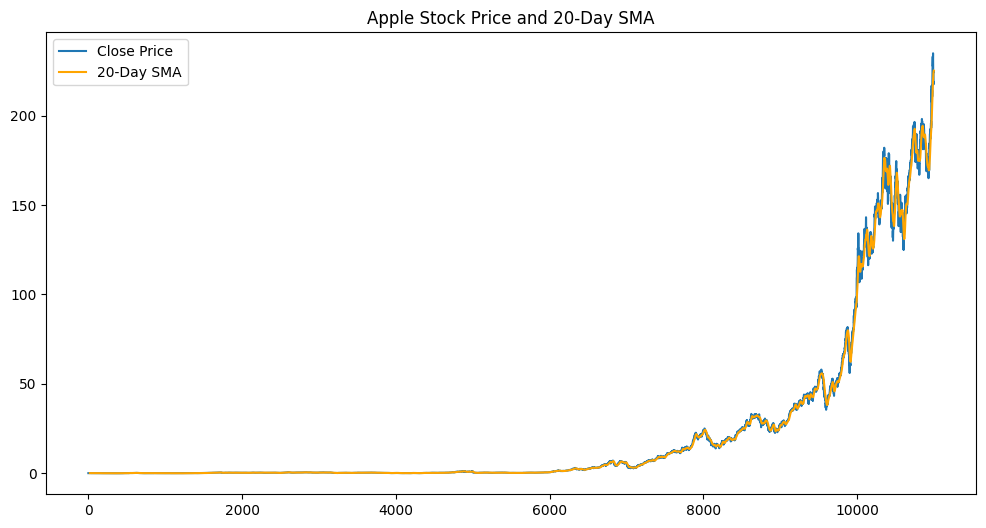

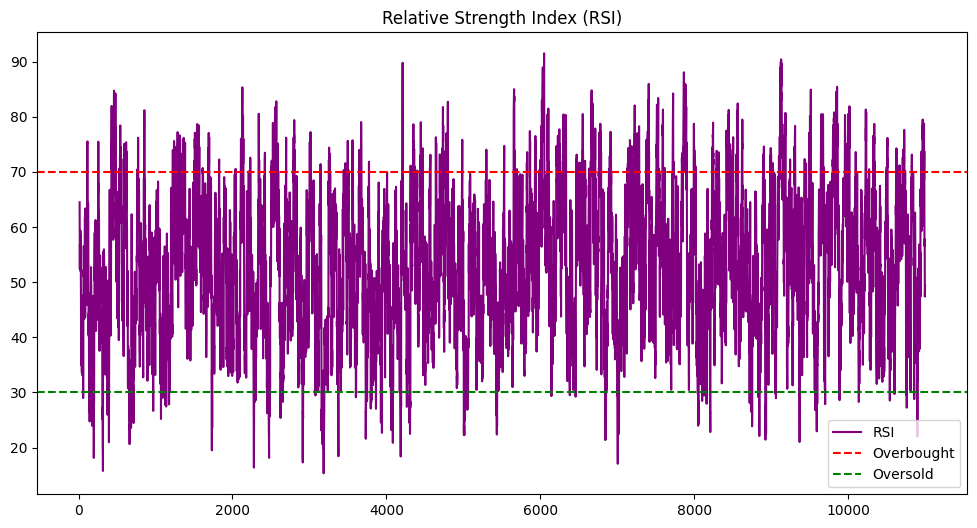

In [17]:
import matplotlib.pyplot as plt

# Plot Close Price and Moving Average
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['Close'], label='Close Price')
plt.plot(aapl_data['SMA_20'], label='20-Day SMA', color='orange')
plt.title('Apple Stock Price and 20-Day SMA')
plt.legend()
plt.show()

# Plot RSI
plt.figure(figsize=(12, 6))
plt.plot(aapl_data['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Overbought')
plt.axhline(30, color='green', linestyle='--', label='Oversold')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()



In [20]:

# Calculate daily returns
aapl_data['Daily_Returns'] = aapl_data['Close'].pct_change()

# Calculate volatility
aapl_data['Volatility'] = aapl_data['Daily_Returns'].rolling(window=20).std()

print(aapl_data[['Daily_Returns', 'Volatility']].head())

print(aapl_data[['Daily_Returns', 'Volatility']].tail())



   Daily_Returns  Volatility
0            NaN         NaN
1      -0.052171         NaN
2      -0.073398         NaN
3       0.024751         NaN
4       0.028992         NaN
       Daily_Returns  Volatility
10993      -0.028754    0.017010
10994      -0.004805    0.016555
10995       0.002161    0.016543
10996       0.001285    0.016036
10997       0.002566    0.014710
